<a href="https://www.kaggle.com/code/intanelaqsha/clustering?scriptVersionId=177534965" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membaca Data

In [2]:
# membaca file csv (comma separated file) menggunakan Pandas
# file akan dibaca dan diubah dalam bentuk Pandas.DataFrame
inputfile = "/kaggle/input/fake-dataset-untuk-clustering/data_pertanian_modern_fake.csv"
data = pd.read_csv('/kaggle/input/fake-dataset-untuk-clustering/data_pertanian_modern_fake.csv')

In [3]:
# tampilkan 5 baris pertama
data.head()

,humidity,temperature,windspeed,precipitation,solar irradiance
0,2.961072,1.506010,2.533052,-2.156108,-0.476586
1,2.809125,0.956902,1.950795,0.269170,0.709486
2,2.711679,2.229877,2.329416,2.715768,-1.407908
3,1.524003,2.487360,1.865546,2.365030,-0.590172
4,0.460455,2.786802,1.430119,2.659718,-0.525686


# Exploratory Data Analysis

Lakukan eksplorasi terhadap data sebanyak-banyaknya, hal ini akan mempermudah analisis daa selanjutnya. 

Misal diberikan contoh sebagai berikut:

In [4]:
data.describe()

,humidity,temperature,windspeed,precipitation,solar irradiance
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.692659,1.905243,1.294340,0.532411,-0.015099
std,2.269123,0.985845,1.182430,2.290802,1.010426
min,-5.352536,-1.137857,-1.691304,-5.252529,-3.323077
25%,-1.042669,1.235996,0.194563,-1.586358,-0.703487
50%,1.326909,1.930901,1.770463,1.288995,-0.040201
75%,2.502796,2.566615,2.181723,2.287685,0.644663
max,4.588613,4.616092,3.832116,5.061844,3.140857


In [5]:
data.info() # menampilkan info data, apakah ada missing atau NaN value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   humidity          500 non-null    float64
 1   temperature       500 non-null    float64
 2   windspeed         500 non-null    float64
 3   precipitation     500 non-null    float64
 4   solar irradiance  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


Note: 
- semua variable/column/feature sudah dinormalisasi
- tidak terdapat *missing* data

Text(0, 0.5, 'Temperature')

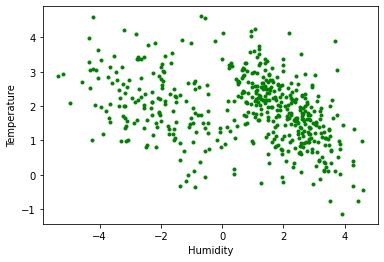

In [6]:
# kita coba plot humidity vs temperature
plt.plot(data['humidity'], data["temperature"], 'g.')
plt.xlabel("Humidity")
plt.ylabel('Temperature')

Text(0.5, 0, 'Temperature')

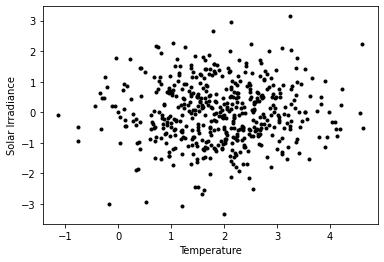

In [7]:
# tambahkan eksplorasi yang ingin kamu lakukan sendiri...
plt.plot(data["temperature"],data['solar irradiance'], 'k.')
plt.ylabel("Solar Irradiance")
plt.xlabel('Temperature')


Text(0.5, 0, 'Temperature')

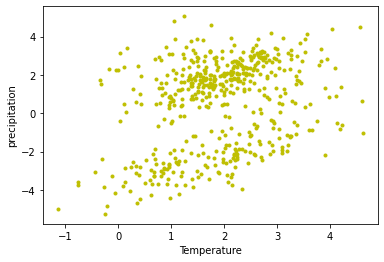

In [8]:
plt.plot(data["temperature"],data['precipitation'], 'y.')
plt.ylabel("precipitation")
plt.xlabel('Temperature')


Text(0.5, 0, 'Temperature')

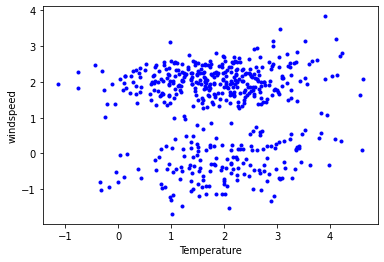

In [9]:
plt.plot(data["temperature"],data['windspeed'], 'b.')
plt.ylabel("windspeed")
plt.xlabel('Temperature')


In [10]:
# karena datanya hanya 5 kolom, 
# maka akan mudah mencari/memperkirakan jumlah cluster secara manual (plot dan lihat dengan mata)
# isi menurut anda data ini terbagi dalam berapa cluster?
n_cluster = 3 # isi perkiraanmu
print(f"Sepertinya ada {n_cluster} cluster")

Sepertinya ada 3 cluster


# Coba lakukan Clustering

Sekarang kita coba lakukan clustering dengan memanfaatkan algoritma yang sudah ada di `scikit-learn`

### Gaussian Mixture

Metode `Gaussian Mixture` memiliki input parameter utama yaitu jumlah mixture (gaussian distribution) yang dapat diartikan sebagai jumlah cluster. Parameter ini dapat diatur dalam input parameter `n_components`

In [11]:
from sklearn.mixture import GaussianMixture # Gaussian Mixture

In [12]:
# ubah dari pandas dataframe to numpy array
# data dalam format numpy.array ini yang akan menjadi input
X = data.to_numpy()


In [13]:
# define the model
# inisiasi model, kita beri nama gm_model
gm_model = GaussianMixture(n_components = n_cluster) # jumlah mixture / jumlah cluster

In [14]:
# fit the model
gm_model.fit(X) # jalankan algoritma ini (buat model)

GaussianMixture(n_components=3)

In [15]:
# assign a cluster to each sample (rows)
yhat = gm_model.predict(X)

# setiap titik data / sampel / row dimasukkan ke dalam anggota salah satu cluster
yhat

array([1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1,
       1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0,
       0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0,
       2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2,
       1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0,
       1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1,

In [16]:
# retrieve unique clusters
clusters = np.unique(yhat) # unique index untuk masing-masing cluster
print(clusters)

[0 1 2]


In [17]:
# beberapa algoritma clustering (dan classification) 
# dapat memberikan nilai probabilitas tiap sampel masuk cluster yang mana
# Gaussian mixture termasuk di dalamnya
yhat_prob = gm_model.predict_proba(X)

yhat_prob

array([[2.05444410e-259, 1.00000000e+000, 9.93562222e-018],
       [1.20050117e-114, 8.40456220e-010, 9.99999999e-001],
       [3.42367951e-047, 5.56989958e-019, 1.00000000e+000],
       ...,
       [1.00000000e+000, 1.08215939e-071, 4.56523349e-023],
       [2.39402476e-100, 1.97871840e-011, 1.00000000e+000],
       [1.51289578e-016, 7.15628890e-026, 1.00000000e+000]])

Periksa hasil clustering dengan melakukan plot dengan memberi warna berbeda untuk cluster yang berbeda

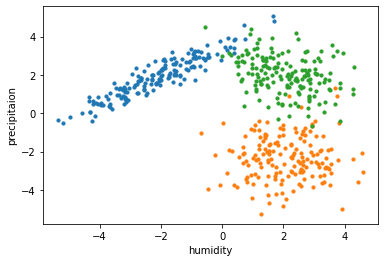

In [18]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix= np.where(yhat == cluster) # get row indexes for samples with this cluster
    
    # isi dengan index variabel apa yang ingin kamu plot
    # misal mau plot humidity vs temperature, maka isi dengan 0 dan 1
    plt.scatter(X[row_ix, 0], X[row_ix, 3], s=10) 

plt.xlabel('humidity') # isi label sesuai dengan yang di plot di atas
plt.ylabel('precipitaion')
plt.show() # show the plot

### Note
Jika kita tidak tahu atau tidak dapat memperkirakan jumlah pengelompokan/cluster yang ada di data, maka biasanya kita coba berbagai nilai jumlah cluster. 

Jumlah cluster terbaik yang "menggambarkan" adanya pengelompokan di data dapat juga ditentukan dengan cara lain, misalnya dengan menghitung `Silhouette score` atau `Elbow method`.

Untuk saat ini kita tidak akan melakukan hal di atas.

### Meanshift

Sekarang coba kita gunakan metode lain, yaitu `meanshift`

In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth # meanshift dan estimate bandwidth

Algoritma *meanshift* membutuhkan input `bandwidth` untuk bekerja (radius kernel), ia akan menentukan jumlah clusternya sendiri berdasarkan nilai `bandwidth` yang diberikan.

Nilai `bandwidth` terbaik dapat diperkirakan dengan cara tertentu, di `scikit-learn` kita bisa gunakan fungsi yang telah ada `estimate_bandwidth` untuk memperkirakan nilai `bandwidth`. 

In [20]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)
print(bandwidth)

2.8801068705469195


In [21]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [22]:
ms.fit(X)
labels = ms.labels_ # hasil clustering (indeks cluster mulai dari 0)
cluster_centers = ms.cluster_centers_

In [23]:
labels_unique = np.unique(labels) #
n_clusters_ = len(labels_unique)

print(f"Number of estimated clusters : {n_clusters_}, {labels_unique}")

Number of estimated clusters : 3, [0 1 2]


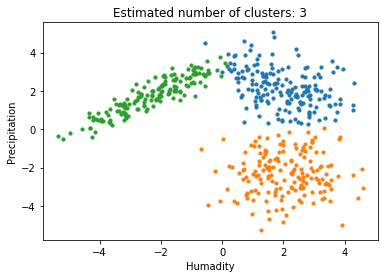

In [24]:
# create scatter plot for samples from each cluster
for lbl in labels_unique:
    row_ix = np.where(labels == lbl) # get row indexes for samples with this cluster
    
    # isi dengan index variabel apa yang ingin kamu plot
    # misal mau plot humidity vs temperature, maka isi dengan 0 dan 1
    plt.scatter(X[row_ix, 0], X[row_ix, 3], s=10) 
    
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('Humadity') # isi label sesuai dengan yang di plot di atas
plt.ylabel('Precipitation')
plt.show()